### Project Overview
- The previous project showed us that the Capital Markets have strong predictive capibilities for the 10 year treasure maturity rate. We will just this theory to classify the 10 year as either loss (1) or a gain(0).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_datareader import data as web

/Users/berkatbhatti/opt/anaconda3/lib/python3.7/site-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [2]:
ten_year = pd.read_csv("resources/10yearTreasuryrate.csv", parse_dates= True, index_col="DATE")

In [3]:
ten_year.columns = ["ten year"]

In [4]:
ten_year = pd.DataFrame(ten_year["ten year"].replace([".", np.nan]))

In [5]:
ten_year

,ten year
DATE,
2015-06-22,2.37
2015-06-23,2.42
2015-06-24,2.38
2015-06-25,2.40
2015-06-26,2.49
...,...
2020-06-16,0.75
2020-06-17,0.74
2020-06-18,0.71


In [6]:
ten_year["ten year"] = pd.to_numeric(ten_year["ten year"])

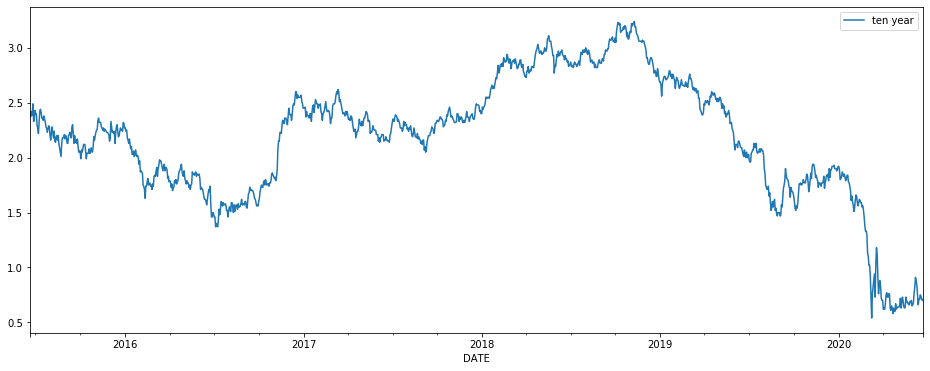

In [7]:
ten_year.plot(figsize = (16,6))

### Grabbing Capital Market Data
- We will use the dates we have available for the ten year

In [8]:
tickers = ["^GSPC", "^DJI", "^IXIC", "^RUT"]

In [9]:
capital_Data = pd.DataFrame()
for t in tickers:
    capital_Data[t] = web.DataReader(t, data_source="yahoo", start = "2015-06-22", end = "2020-06-22")["Open"]
    

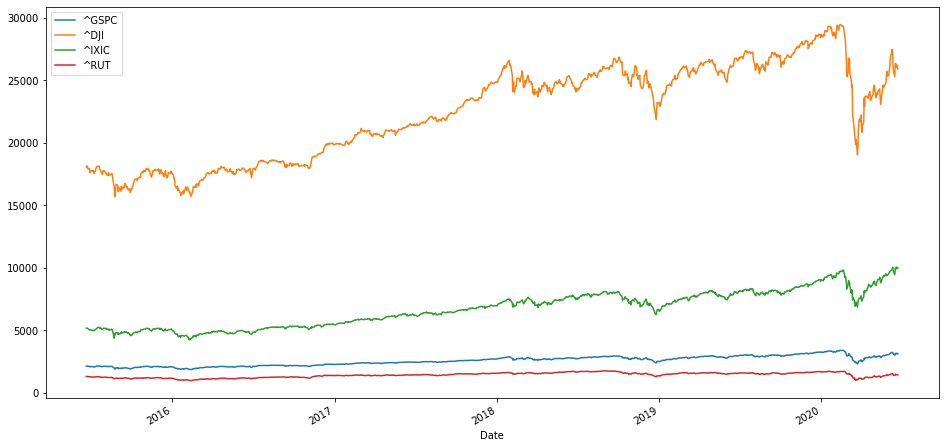

In [10]:
capital_Data.plot(figsize= (16,8))

### Combining the Data

In [11]:
working_Data = pd.concat([capital_Data, ten_year], axis=1)

In [12]:
working_Data

,^GSPC,^DJI,^IXIC,^RUT,ten year
2015-06-22,2112.500000,18027.630859,5147.870117,1290.560059,2.37
2015-06-23,2123.159912,18121.779297,5161.680176,1294.369995,2.42
2015-06-24,2123.649902,18139.099609,5151.379883,1293.810059,2.38
2015-06-25,2109.959961,17977.109375,5139.479980,1286.969971,2.40
2015-06-26,2102.620117,17892.029297,5113.259766,1285.229980,2.49
...,...,...,...,...,...
2020-06-16,3131.000000,26326.679688,9949.780273,1432.349976,0.75
2020-06-17,3136.129883,26330.519531,9943.309570,1453.329956,0.74
2020-06-18,3101.639893,26016.449219,9892.480469,1424.719971,0.71
2020-06-19,3140.290039,26213.099609,10042.129883,1430.650024,0.70


### Checking for missing data
- appears 46 days are missing out of the capital markets data
- Will Drop these form data

In [13]:
working_Data.isnull().sum()

^GSPC       46
^DJI        46
^IXIC       46
^RUT        46
ten year     0
dtype: int64

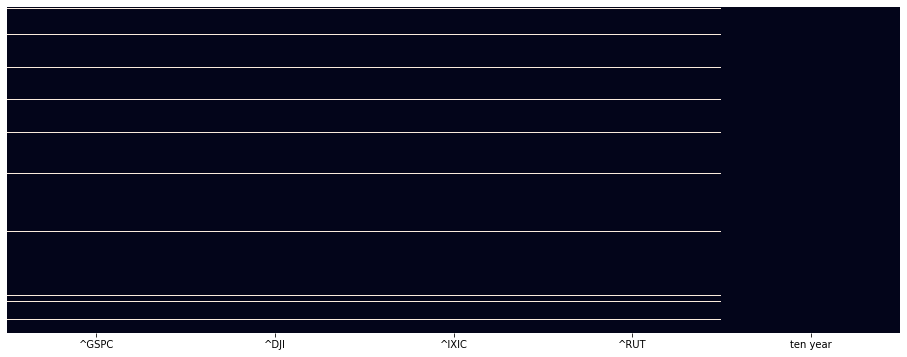

In [14]:
plt.figure(figsize=(16,6))
sns.heatmap(working_Data.isnull(), yticklabels=False, cbar=False)

### Dropping missing data

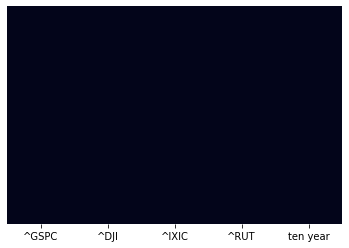

In [15]:
sns.heatmap(working_Data.dropna().isnull(), yticklabels=False, cbar=False)

In [16]:
working_Data.dropna(inplace=True)

In [17]:
working_Data

,^GSPC,^DJI,^IXIC,^RUT,ten year
2015-06-22,2112.500000,18027.630859,5147.870117,1290.560059,2.37
2015-06-23,2123.159912,18121.779297,5161.680176,1294.369995,2.42
2015-06-24,2123.649902,18139.099609,5151.379883,1293.810059,2.38
2015-06-25,2109.959961,17977.109375,5139.479980,1286.969971,2.40
2015-06-26,2102.620117,17892.029297,5113.259766,1285.229980,2.49
...,...,...,...,...,...
2020-06-16,3131.000000,26326.679688,9949.780273,1432.349976,0.75
2020-06-17,3136.129883,26330.519531,9943.309570,1453.329956,0.74
2020-06-18,3101.639893,26016.449219,9892.480469,1424.719971,0.71
2020-06-19,3140.290039,26213.099609,10042.129883,1430.650024,0.70


### Preping that data for processing
- We will use the daily returns for the 10 year to create a one hot encoding for the values

In [18]:
working_Data["ten year returns"] = working_Data["ten year"].pct_change()

In [19]:
working_Data

,^GSPC,^DJI,^IXIC,^RUT,ten year,ten year returns
2015-06-22,2112.500000,18027.630859,5147.870117,1290.560059,2.37,NaN
2015-06-23,2123.159912,18121.779297,5161.680176,1294.369995,2.42,0.021097
2015-06-24,2123.649902,18139.099609,5151.379883,1293.810059,2.38,-0.016529
2015-06-25,2109.959961,17977.109375,5139.479980,1286.969971,2.40,0.008403
2015-06-26,2102.620117,17892.029297,5113.259766,1285.229980,2.49,0.037500
...,...,...,...,...,...,...
2020-06-16,3131.000000,26326.679688,9949.780273,1432.349976,0.75,0.056338
2020-06-17,3136.129883,26330.519531,9943.309570,1453.329956,0.74,-0.013333
2020-06-18,3101.639893,26016.449219,9892.480469,1424.719971,0.71,-0.040541
2020-06-19,3140.290039,26213.099609,10042.129883,1430.650024,0.70,-0.014085


## Dropping the Ten yer value 
- This will be a perfect predictor of the returns so we will need to remove it

In [20]:
working_Data.drop("ten year", axis=1, inplace=True)

In [21]:
working_Data

,^GSPC,^DJI,^IXIC,^RUT,ten year returns
2015-06-22,2112.500000,18027.630859,5147.870117,1290.560059,NaN
2015-06-23,2123.159912,18121.779297,5161.680176,1294.369995,0.021097
2015-06-24,2123.649902,18139.099609,5151.379883,1293.810059,-0.016529
2015-06-25,2109.959961,17977.109375,5139.479980,1286.969971,0.008403
2015-06-26,2102.620117,17892.029297,5113.259766,1285.229980,0.037500
...,...,...,...,...,...
2020-06-16,3131.000000,26326.679688,9949.780273,1432.349976,0.056338
2020-06-17,3136.129883,26330.519531,9943.309570,1453.329956,-0.013333
2020-06-18,3101.639893,26016.449219,9892.480469,1424.719971,-0.040541
2020-06-19,3140.290039,26213.099609,10042.129883,1430.650024,-0.014085


In [22]:
working_Data.dropna(inplace=True)

### Processing the data for model
- Since the ten year value and retuns can be perfect predictors of the one hot encode will drop these colums

## Data prepration

In [23]:
X = working_Data.drop("ten year returns", axis=1).values
y = working_Data["ten year returns"].values

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

### Scaling the data to a normal distribution

In [26]:
from sklearn.preprocessing import MinMaxScaler

In [27]:
scalar = MinMaxScaler()

In [28]:
X_train = scalar.fit_transform(X_train)

In [29]:
X_test = scalar.transform(X_test)

## Early Stopping

In [30]:
from tensorflow.keras.callbacks import EarlyStopping

In [31]:
stop = EarlyStopping(monitor="val_loss", mode="min", patience=100)

### Creating Model

In [32]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [33]:
model = Sequential()
model.add(Dense(units = 125, activation = "relu"))
model.add(Dense(units = 100, activation = "relu"))
model.add(Dense(units = 90, activation = "relu"))
model.add(Dense(units = 90, activation = "relu"))
model.add(Dense(units = 1))
model.compile(loss="mse", optimizer = "adam")

## Fittng Model

In [34]:
model.fit(X_train,y_train, validation_data=(X_test, y_test), epochs=500, callbacks=[stop])

Train on 881 samples, validate on 378 samples
Epoch 1/500
881/881 [==============================] - 2s 2ms/sample - loss: 0.0011 - val_loss: 0.0018
Epoch 2/500
881/881 [==============================] - 0s 298us/sample - loss: 8.5522e-04 - val_loss: 0.0018
Epoch 3/500
881/881 [==============================] - 0s 297us/sample - loss: 8.9948e-04 - val_loss: 0.0018
Epoch 4/500
881/881 [==============================] - 0s 296us/sample - loss: 8.7569e-04 - val_loss: 0.0018
Epoch 5/500
881/881 [==============================] - 0s 295us/sample - loss: 8.5711e-04 - val_loss: 0.0018
Epoch 6/500
881/881 [==============================] - 0s 296us/sample - loss: 9.0068e-04 - val_loss: 0.0018
Epoch 7/500
881/881 [==============================] - 0s 301us/sample - loss: 9.1254e-04 - val_loss: 0.0019
Epoch 8/500
881/881 [==============================] - 0s 298us/sample - loss: 8.6702e-04 - val_loss: 0.0018
Epoch 9/500
881/881 [==============================] - 0s 298us/sample - loss: 8.6244e-0

881/881 [==============================] - 0s 298us/sample - loss: 8.3250e-04 - val_loss: 0.0018
Epoch 76/500
881/881 [==============================] - 0s 298us/sample - loss: 8.2490e-04 - val_loss: 0.0018
Epoch 77/500
881/881 [==============================] - 0s 295us/sample - loss: 8.2756e-04 - val_loss: 0.0018
Epoch 78/500
881/881 [==============================] - 0s 294us/sample - loss: 8.4200e-04 - val_loss: 0.0018
Epoch 79/500
881/881 [==============================] - 0s 295us/sample - loss: 8.4143e-04 - val_loss: 0.0018
Epoch 80/500
881/881 [==============================] - 0s 299us/sample - loss: 8.3379e-04 - val_loss: 0.0018
Epoch 81/500
881/881 [==============================] - 0s 297us/sample - loss: 8.2831e-04 - val_loss: 0.0018
Epoch 82/500
881/881 [==============================] - 0s 302us/sample - loss: 8.2576e-04 - val_loss: 0.0019
Epoch 83/500
881/881 [==============================] - 0s 296us/sample - loss: 8.4232e-04 - val_loss: 0.0017
Epoch 84/500
881/881 [=

881/881 [==============================] - 0s 296us/sample - loss: 7.9211e-04 - val_loss: 0.0019
Epoch 150/500
881/881 [==============================] - 0s 296us/sample - loss: 7.9752e-04 - val_loss: 0.0018
Epoch 151/500
881/881 [==============================] - 0s 295us/sample - loss: 7.9000e-04 - val_loss: 0.0018
Epoch 152/500
881/881 [==============================] - 0s 294us/sample - loss: 8.1217e-04 - val_loss: 0.0018
Epoch 153/500
881/881 [==============================] - 0s 294us/sample - loss: 8.0307e-04 - val_loss: 0.0017
Epoch 154/500
881/881 [==============================] - 0s 295us/sample - loss: 7.8566e-04 - val_loss: 0.0018
Epoch 155/500
881/881 [==============================] - 0s 300us/sample - loss: 7.9752e-04 - val_loss: 0.0017
Epoch 156/500
881/881 [==============================] - 0s 295us/sample - loss: 7.9661e-04 - val_loss: 0.0017
Epoch 157/500
881/881 [==============================] - 0s 296us/sample - loss: 7.8006e-04 - val_loss: 0.0017
Epoch 158/500
8

Epoch 223/500
881/881 [==============================] - 0s 306us/sample - loss: 7.0867e-04 - val_loss: 0.0017
Epoch 224/500
881/881 [==============================] - 0s 297us/sample - loss: 6.9971e-04 - val_loss: 0.0017
Epoch 225/500
881/881 [==============================] - 0s 294us/sample - loss: 7.4053e-04 - val_loss: 0.0017
Epoch 226/500
881/881 [==============================] - 0s 299us/sample - loss: 6.8351e-04 - val_loss: 0.0017
Epoch 227/500
881/881 [==============================] - 0s 296us/sample - loss: 7.0075e-04 - val_loss: 0.0017
Epoch 228/500
881/881 [==============================] - 0s 295us/sample - loss: 6.9960e-04 - val_loss: 0.0017
Epoch 229/500
881/881 [==============================] - 0s 296us/sample - loss: 6.7569e-04 - val_loss: 0.0017
Epoch 230/500
881/881 [==============================] - 0s 301us/sample - loss: 7.4073e-04 - val_loss: 0.0017
Epoch 231/500
881/881 [==============================] - 0s 293us/sample - loss: 7.6192e-04 - val_loss: 0.0017
E

Epoch 297/500
881/881 [==============================] - 0s 308us/sample - loss: 7.0844e-04 - val_loss: 0.0018
Epoch 298/500
881/881 [==============================] - 0s 296us/sample - loss: 7.4541e-04 - val_loss: 0.0017
Epoch 299/500
881/881 [==============================] - 0s 291us/sample - loss: 6.8059e-04 - val_loss: 0.0017
Epoch 300/500
881/881 [==============================] - 0s 295us/sample - loss: 6.4777e-04 - val_loss: 0.0017
Epoch 301/500
881/881 [==============================] - 0s 295us/sample - loss: 6.4229e-04 - val_loss: 0.0017
Epoch 302/500
881/881 [==============================] - 0s 327us/sample - loss: 6.3731e-04 - val_loss: 0.0017
Epoch 303/500
881/881 [==============================] - 0s 294us/sample - loss: 6.1873e-04 - val_loss: 0.0018
Epoch 304/500
881/881 [==============================] - 0s 294us/sample - loss: 6.2792e-04 - val_loss: 0.0018
Epoch 305/500
881/881 [==============================] - 0s 300us/sample - loss: 6.5547e-04 - val_loss: 0.0018
E

Epoch 371/500
881/881 [==============================] - 0s 299us/sample - loss: 6.8063e-04 - val_loss: 0.0018
Epoch 372/500
881/881 [==============================] - 0s 295us/sample - loss: 6.1302e-04 - val_loss: 0.0019
Epoch 373/500
881/881 [==============================] - 0s 295us/sample - loss: 5.8781e-04 - val_loss: 0.0018


## model Evaluation 

In [35]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                multiple                  625       
_________________________________________________________________
dense_1 (Dense)              multiple                  12600     
_________________________________________________________________
dense_2 (Dense)              multiple                  9090      
_________________________________________________________________
dense_3 (Dense)              multiple                  8190      
_________________________________________________________________
dense_4 (Dense)              multiple                  91        
Total params: 30,596
Trainable params: 30,596
Non-trainable params: 0
_________________________________________________________________


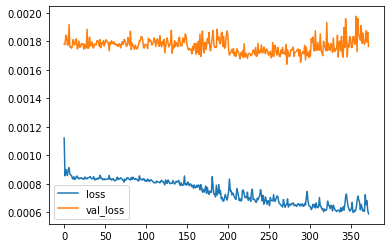

In [36]:
pd.DataFrame(model.history.history).plot()